# Feature Engineering

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset.


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance_claims_cleaned.csv')

In [51]:
data.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48.0,42.0,29.0,41.0,44.0
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25,2014-06-06
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000.0,2000.0,2000.0,2000.0,1000.0
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


### Missing Values

In [52]:
null_counts = data.isnull().sum()
null_counts

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         1
insured_occupation              0
insured_hobbies                 2
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          93
incident_state                  2
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [53]:
data['authorities_contacted'] = data['authorities_contacted'].fillna('None')

In [54]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


In [55]:
numeric_columns = data.select_dtypes(include=['number']).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [56]:
categoric_columns = data.select_dtypes(include=['object']).columns

data[categoric_columns] = data[categoric_columns].fillna('None')

In [57]:
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

In [58]:
data['umbrella_limit'] = data['umbrella_limit'].abs()

In [59]:
null_counts = data.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Bining Numeric Data

In [60]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.962926,546238.648000,1134.268537,1257.001113,1.103000e+06,501214.488000,25176.452906,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000
std,115.113174,9.126276,257063.005276,610.639744,243.898011,2.296446e+06,71701.610941,27849.459762,28104.096686,6.951373,1.01888,0.820127,1.111335,26352.431456,4880.713630,4824.634340,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,0.000000e+00,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1090.567500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41962.500000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57880.000000,6780.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70532.500000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


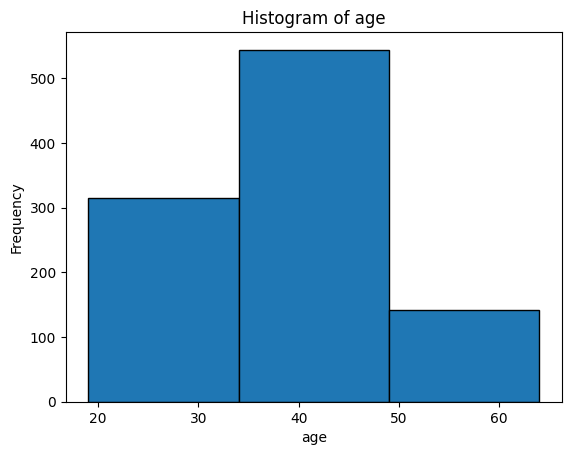

In [61]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(data[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [62]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
data['ages_category'] = pd.cut(data['age'], bins=bin_edges, labels=bin_labels)

In [63]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged


In [64]:
bin_edges_customer = [-1, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
data['customer_category'] = pd.cut(data['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [65]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [66]:
data["Contract Years"] = data["months_as_customer"]/12

In [67]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [68]:
data['total_premiums_paid'] = (data['policy_annual_premium']/12) * data['months_as_customer']

In [69]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [70]:
data['net_value_of_customer'] = data['total_premiums_paid'] - data['total_claim_amount']

In [71]:
data.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48.0,42.0,29.0,41.0,44.0
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25,2014-06-06
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000.0,2000.0,2000.0,2000.0,1000.0
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


## Saving the csv for late

In [72]:
null_counts = data.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [73]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/insurance_claims_features_data.csv')